In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
mpl.style.use("ggplot")
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
from io import StringIO

**EXERCISE DESCRIPTION**

__Scenario__

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.
recession period 1 - year 1980
recession period 2 - year 1981 to 1982
recession period 3 - year 1991
recession period 4 - year 2000 to 2001
recession period 5 - year end 2007 to mid 2009
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)

__Data Description__
The dataset used for this visualization assignment contains historical_automobile_sales data representing automobile sales and related variables during recession and non-recession period.

The dataset includes the following variables:
1. Date: The date of the observation.
2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
3. Automobile_Sales: The number of vehicles sold during the period.
4. GDP: The per capita GDP value in USD.
5. Unemployment_Rate: The monthly unemployment rate.
6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
8. Price: The average vehicle price during the period.
9. Advertising_Expenditure: The advertising expenditure of the company.
10. Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.
11. Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
12. Month: Month of the observation extracted from Date..
13. Year: Year of the observation extracted from Date.

By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

In [2]:
#store the URL where the dataset is
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

response = requests.get(url)

#if the request is successfull
if response.status_code == 200:
    print("Request sucessfull!")
    content = response.content
    
    # Create a StringIO object from the raw binary data
    # This allows pandas to read the CSV directly from memory
    csv_data = StringIO(content.decode('utf-8'))
    
    #create the dataframe
    df = pd.read_csv(csv_data)
    print("Data Frame created.")
else:
    print("Something's wrong.")

Request sucessfull!
Data Frame created.


In [3]:
#let's take a look at the dataframe
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
#a short summary of our dataframe
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
#see rows and columns of the dataframe
df.shape

(528, 15)

In [6]:
#see names of columns
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [7]:
#see data types of columns
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

__Exercise 1.1__: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.

In [8]:
#create a yearly sales variable by grouping per year and summing sales for each year
df_yearly_sales = df.groupby(['Year'])['Automobile_Sales'].sum().reset_index()

In [9]:
#annotate two years of recession
#in order to find the years we need to find the 2 lowest sales values and the respective year from the dataframe
df_yearly_sales.nsmallest(2,"Automobile_Sales")['Year'].values

array([1982, 2009])

In [10]:
df_yearly_sales.nsmallest(2,"Automobile_Sales")['Automobile_Sales'].values

array([7573.8, 7580.3])

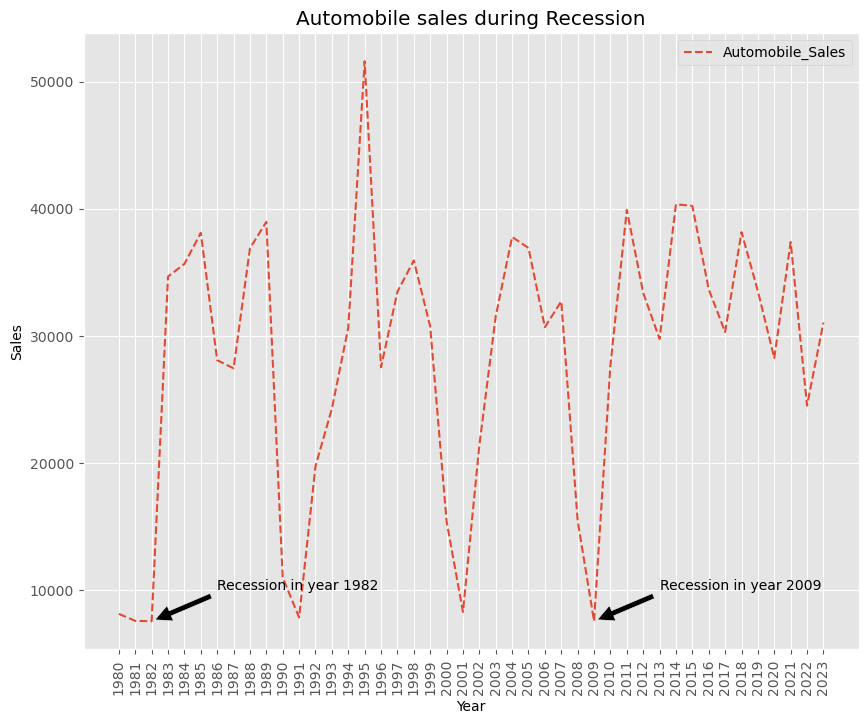

In [11]:
# Create the line plot
ax = df_yearly_sales.plot('Year',
                          'Automobile_Sales',
                          kind = 'line',
                          figsize = (10,8),
                          title = "Automobile sales during Recession",
                          legend = True,
                          rot = 90,
                          xticks = [i for i in df_yearly_sales['Year'].astype(np.float64)],
                          ylabel = "Sales",
                          linestyle = '--')

#create the first annotation
ax.annotate(f"Recession in year {str(1982)}",
            xy=(1982,7573.8),
            xytext=(1986,10000),
            arrowprops=dict(facecolor='black', shrink=0.05))

#create the second annotation
ax.annotate(f"Recession in year {str(2009)}",
            xy=(2009,7580.3),
            xytext=(2013,10000),
            arrowprops=dict(facecolor='black', shrink=0.05))

#show the plot
plt.show()

__Exercise 1.2__: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [12]:
df['Vehicle_Type'].unique()

array(['Supperminicar', 'Mediumfamilycar', 'Smallfamiliycar', 'Sports',
       'Executivecar'], dtype=object)

In [13]:
#create a pivot table where the index will be the years and the columns will be the car categories
#and the values will be the sum of sales on each category for each year
df_pivot = df.pivot_table(index='Year', columns='Vehicle_Type', values='Automobile_Sales', aggfunc='sum')

#fill the nan values with zero
df_pivot = df_pivot.fillna(0)

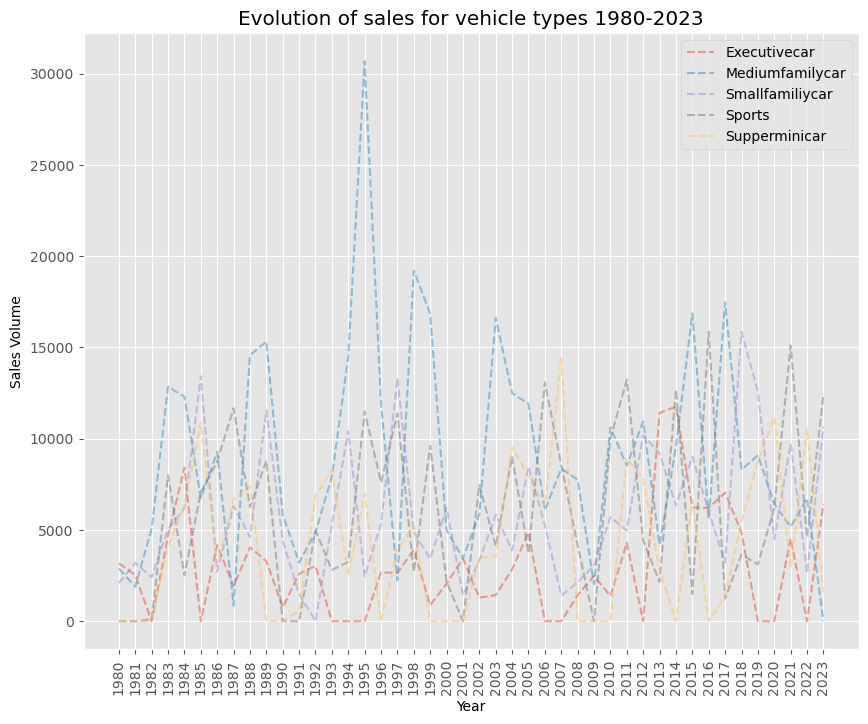

In [14]:
plt.figure(figsize = (10,8)) #set the figure

#create the plot
plt.plot(df_pivot.index, df_pivot[['Supperminicar', 'Mediumfamilycar', 'Smallfamiliycar', 'Sports', 'Executivecar']],
         linestyle = '--', alpha = 0.5)

#add a legend
plt.legend(labels = [i for i in df_pivot.columns])


plt.xticks([i for i in df_yearly_sales['Year'].astype(np.float64)], rotation = 90) #set the xticks to be all the years and rotate them.
plt.xlabel('Year')#set label for x axis
plt.ylabel('Sales Volume') #set label for y axis
plt.title("Evolution of sales for vehicle types 1980-2023") #set title

#show the figure
plt.show()

In [15]:
#let's see once more the sales figures during the years of recession.
df_pivot.loc[[1980,1981,1982,1991,2000,2001,2008,2009,2020],:]

Vehicle_Type,Executivecar,Mediumfamilycar,Smallfamiliycar,Sports,Supperminicar
Year,,,,,
1980,0.0,2882.5,2085.7,0.0,3179.2
1981,0.0,1885.2,3192.1,0.0,2523.6
1982,0.0,5062.9,2408.9,102.0,0.0
1991,564.0,3210.7,1495.8,0.0,2600.2
2000,0.0,4995.3,6219.3,2168.0,2058.9
2001,0.0,3448.5,1426.9,0.0,3430.2
2008,0.0,7752.2,2131.7,4163.9,1426.8
2009,0.0,2035.4,3059.8,0.0,2485.1
2020,11169.1,6423.7,4490.4,6178.8,0.0


During the periods of recession the sales of executive cars drop most of the times to 0. The same replies for Sports cars.
On the other hand, medium family car and small family car sales tend to increase.

__Exercise 1.3__: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

In [16]:
#average the sales per year in a new dataframe that has a pivot table form
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

In [17]:
#let's see the new dataframe rounded to two decimal places for the automobile sales figure.
new_df['Automobile_Sales'] = round(new_df['Automobile_Sales'],2)
new_df

,Recession,Automobile_Sales
0,0,2816.75
1,1,648.52


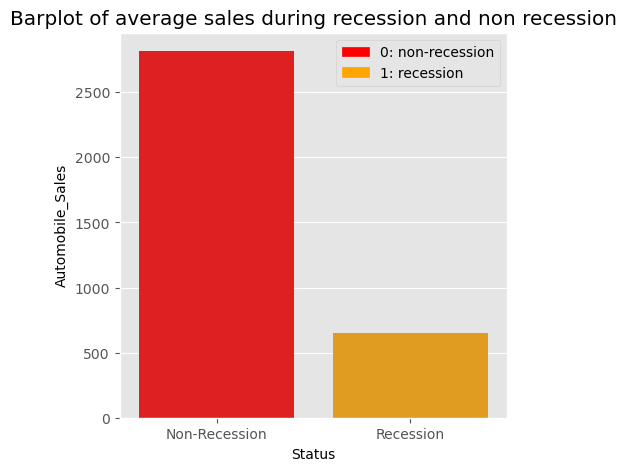

In [18]:
#we will create a barplot using the sns functionality
plt.figure(figsize = (5,5))
sns.barplot(data = new_df,
            x = 'Recession',
            y = 'Automobile_Sales',
            palette = ['red', 'orange'])

# Create custom legend labels with colors matching the bars
legend_labels = ['0: non-recession', '1: recession']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in ['red', 'orange']]


# Add custom legend
plt.legend(legend_handles, legend_labels)

#set the xticks
plt.xticks(ticks = [0,1], labels = ['Non-Recession', 'Recession'])
#show the figure

#set the xlabel
plt.xlabel("Status")
#set a title
plt.title("Barplot of average sales during recession and non recession")

plt.show()

In [19]:
#average the sales per year in a new dataframe that has a pivot table form
grouped_df = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

In [20]:
#let's see the new dataframe rounded to two decimal places for the automobile sales figure.
grouped_df['Automobile_Sales'] = grouped_df['Automobile_Sales'].apply(lambda x: round(x,2))
grouped_df

,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.44
1,0,Mediumfamilycar,2981.50
2,0,Smallfamiliycar,2752.66
3,0,Sports,2910.64
4,0,Supperminicar,2495.24
5,1,Executivecar,564.00
6,1,Mediumfamilycar,674.85
7,1,Smallfamiliycar,650.73
8,1,Sports,170.33
9,1,Supperminicar,659.27


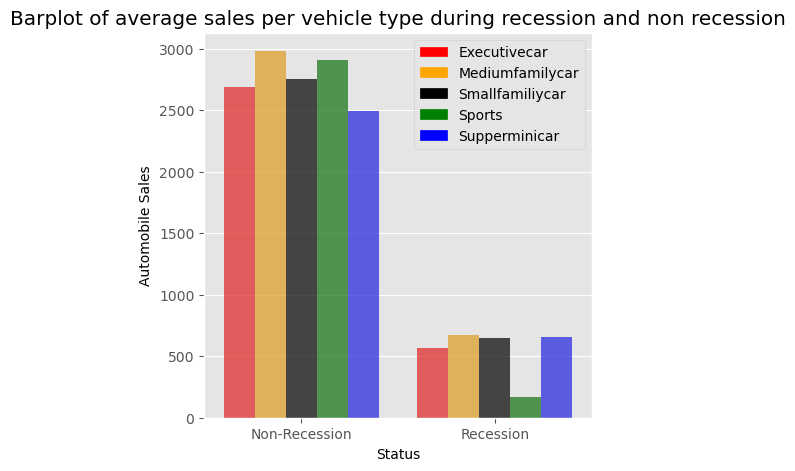

In [21]:
#we will create a barplot using the sns functionality
plt.figure(figsize = (5,5))
sns.barplot(data = grouped_df,
            x = 'Recession',
            y = 'Automobile_Sales',
            hue = 'Vehicle_Type',
            palette = ['red', 'orange', 'black', 'green','blue'],
            alpha = 0.7)


legend_labels1 = ['Executivecar', 'Mediumfamilycar','Smallfamiliycar','Sports','Supperminicar']
legend_handles1 = [plt.Rectangle((0,0),1,1, color=color) for color in ['red', 'orange', 'black', 'green','blue']]

plt.legend(legend_handles1, legend_labels1)

#set the xticks
plt.xticks(ticks = [0,1], labels = ['Non-Recession', 'Recession'])
#show the figure

#set the xlabel
plt.xlabel("Status")
plt.ylabel("Automobile Sales")

#set a title
plt.title("Barplot of average sales per vehicle type during recession and non recession")

#show the fig3
plt.show()

__Inference__:
We can conclude that during recession periods the average sales drop significantly below 1000 units while during non-recession periods sales for almost all categories reach for sure 2500 points.

__Exercise__ 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

In [22]:
#first we will need to two create two dataframes in order to split the data based on whether
#they correspond to a recession year or not.

df_rec = df[df['Recession'] == 1]
df_nrec = df[df['Recession'] == 0]

In [23]:
#first we'll see the dataframe that corresponds to a recession
df_rec.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [24]:
#we will group the dataframe based on the year and extract the mean annual gdp growth_rate
df_rec = df_rec.groupby(['Year'])['GDP'].mean().reset_index()

In [25]:
#let's see the dataframe
df_rec.head()

,Year,GDP
0,1980,41.101917
1,1981,35.615250
2,1982,39.580667
3,1983,22.287000
4,1990,36.477182


In [26]:
#first we'll see the dataframe that corresponds to a non-recession
df_nrec.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
113,2/28/1983,1983,Feb,0,126.06,0.75,15201.649,4621,4,12.819,-1.119666,2.4,3799.1,Sports,Georgia
114,3/31/1983,1983,Mar,0,92.67,1.50,18359.070,3038,8,12.945,0.009733,1.5,3533.5,Smallfamiliycar,California
115,4/30/1983,1983,Apr,0,96.39,1.00,25984.306,4490,8,25.206,0.486432,2.0,3240.4,Supperminicar,Illinois
116,5/31/1983,1983,May,0,91.81,1.50,28692.333,4677,8,14.630,-0.722898,2.3,908.1,Smallfamiliycar,California
117,6/30/1983,1983,Jun,0,106.16,0.75,25856.841,2118,5,18.765,0.220357,2.3,4769.8,Mediumfamilycar,Illinois


In [27]:
#we will group the dataframe based on the year and extract the mean annual gdp growth_rate
df_nrec = df_nrec.groupby(['Year'])['GDP'].mean().reset_index()

In [28]:
#first we'll see the dataframe that corresponds to a non-recession
df_nrec.head()

,Year,GDP
0,1983,32.686091
1,1984,39.260750
2,1985,46.354500
3,1986,33.154750
4,1987,41.125833


/var/folders/8q/cny955gd2434t_z_4ls5f2l40000gn/T/ipykernel_34126/1488935304.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(np.arange(1980,2021,5),rotation = 45)
/var/folders/8q/cny955gd2434t_z_4ls5f2l40000gn/T/ipykernel_34126/1488935304.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(np.arange(1980,2021,5),rotation = 45)
/var/folders/8q/cny955gd2434t_z_4ls5f2l40000gn/T/ipykernel_34126/1488935304.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(np.arange(1980,2021,5),rotation = 45)


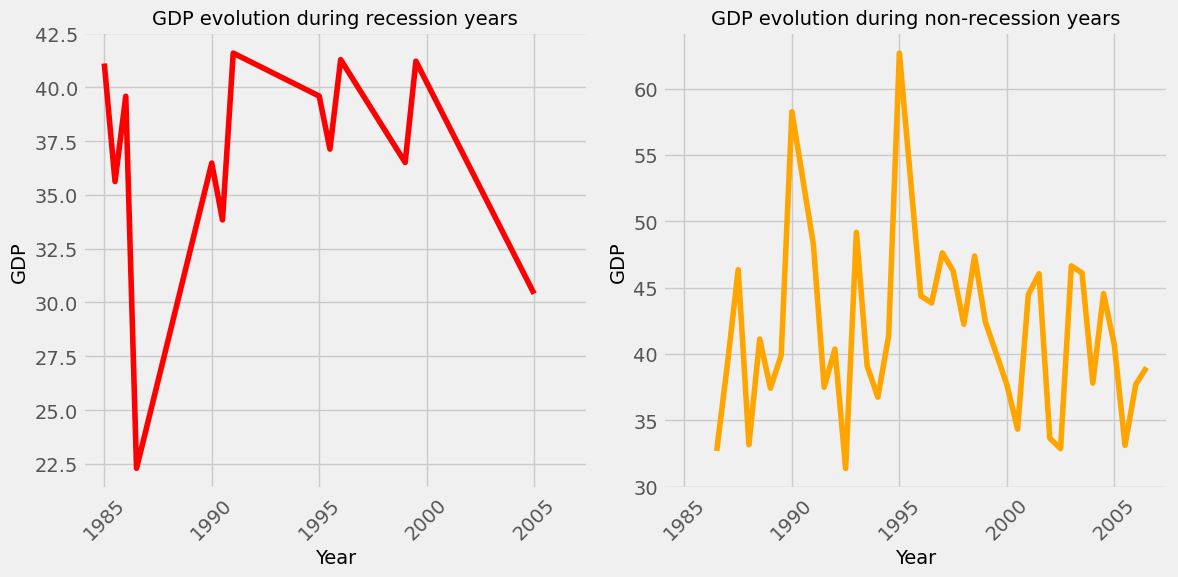

In [29]:

#we have our dataframes now we will create two plots
mpl.style.use('fivethirtyeight')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6)) #create two axes in the same row and different column


ax1.plot(df_rec['Year'], df_rec['GDP'], color = 'red')
ax1.set_xticklabels(np.arange(1980,2021,5),rotation = 45)
ax1.set_xticklabels(np.arange(1980,2021,5),rotation = 45)
ax1.set_ylabel('GDP')
ax1.set_xlabel('Year')
ax1.set_xlim(df['Year'].min()-2, df['Year'].max()+2)
ax1.set_title("GDP evolution during recession years", fontsize = 14)

ax2.plot(df_nrec['Year'], df_nrec['GDP'],color = 'orange')
ax2.set_xticklabels(np.arange(1980,2021,5),rotation = 45)
ax2.set_ylabel('GDP')
ax2.set_xlabel('Year')
ax2.set_title("GDP evolution during non-recession years", fontsize = 14)
ax2.set_xlim(df['Year'].min()-2, df['Year'].max()+2)
plt.tight_layout()

#show the figure
plt.show()

From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company.

__Exercise__ 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

In [30]:
#We will use the variable df_nrec = df[df['Recession'] == 0] which contains all the non-recession data
df_nrec = df[df['Recession'] == 0]

In [31]:
#take a look at the dataset
df_nrec.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
113,2/28/1983,1983,Feb,0,126.06,0.75,15201.649,4621,4,12.819,-1.119666,2.4,3799.1,Sports,Georgia
114,3/31/1983,1983,Mar,0,92.67,1.50,18359.070,3038,8,12.945,0.009733,1.5,3533.5,Smallfamiliycar,California
115,4/30/1983,1983,Apr,0,96.39,1.00,25984.306,4490,8,25.206,0.486432,2.0,3240.4,Supperminicar,Illinois
116,5/31/1983,1983,May,0,91.81,1.50,28692.333,4677,8,14.630,-0.722898,2.3,908.1,Smallfamiliycar,California
117,6/30/1983,1983,Jun,0,106.16,0.75,25856.841,2118,5,18.765,0.220357,2.3,4769.8,Mediumfamilycar,Illinois


In [32]:
norm_seas_weight = df_nrec['Seasonality_Weight'] #extract the seasonality weights

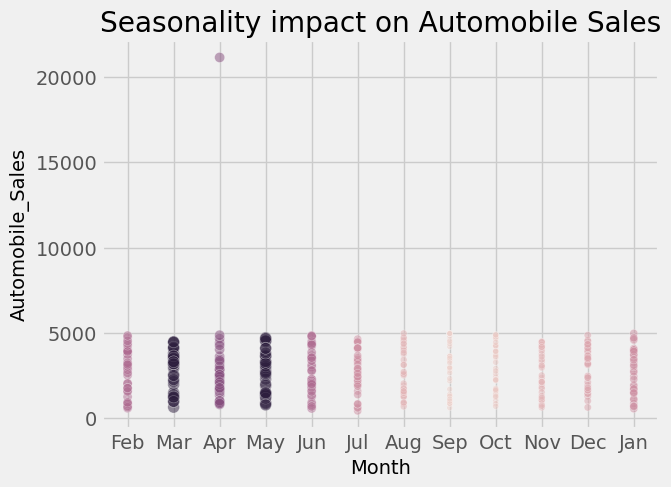

In [34]:
#create the figure
plt.figure()

#plot the data
sns.scatterplot(data = df_nrec, x = 'Month', y = 'Automobile_Sales',
                size=norm_seas_weight, #add the weights
                color = 'red', #adjust color
                alpha = 0.5, #increase transaprency
                hue = 'Seasonality_Weight', #add a hue
                legend = False)

plt.xlabel('Month') #set an x label
plt.ylabel('Automobile_Sales') #set a y label
plt.title('Seasonality impact on Automobile Sales') #set a title

plt.show() #show the figure

__Inference__

From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April

__Exercise 1.6__: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

In [35]:
#we extract the recession data
df_rec = df[df['Recession'] == 0]

In [36]:
#take a look at the dataframe
df_rec.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
113,2/28/1983,1983,Feb,0,126.06,0.75,15201.649,4621,4,12.819,-1.119666,2.4,3799.1,Sports,Georgia
114,3/31/1983,1983,Mar,0,92.67,1.50,18359.070,3038,8,12.945,0.009733,1.5,3533.5,Smallfamiliycar,California
115,4/30/1983,1983,Apr,0,96.39,1.00,25984.306,4490,8,25.206,0.486432,2.0,3240.4,Supperminicar,Illinois
116,5/31/1983,1983,May,0,91.81,1.50,28692.333,4677,8,14.630,-0.722898,2.3,908.1,Smallfamiliycar,California
117,6/30/1983,1983,Jun,0,106.16,0.75,25856.841,2118,5,18.765,0.220357,2.3,4769.8,Mediumfamilycar,Illinois


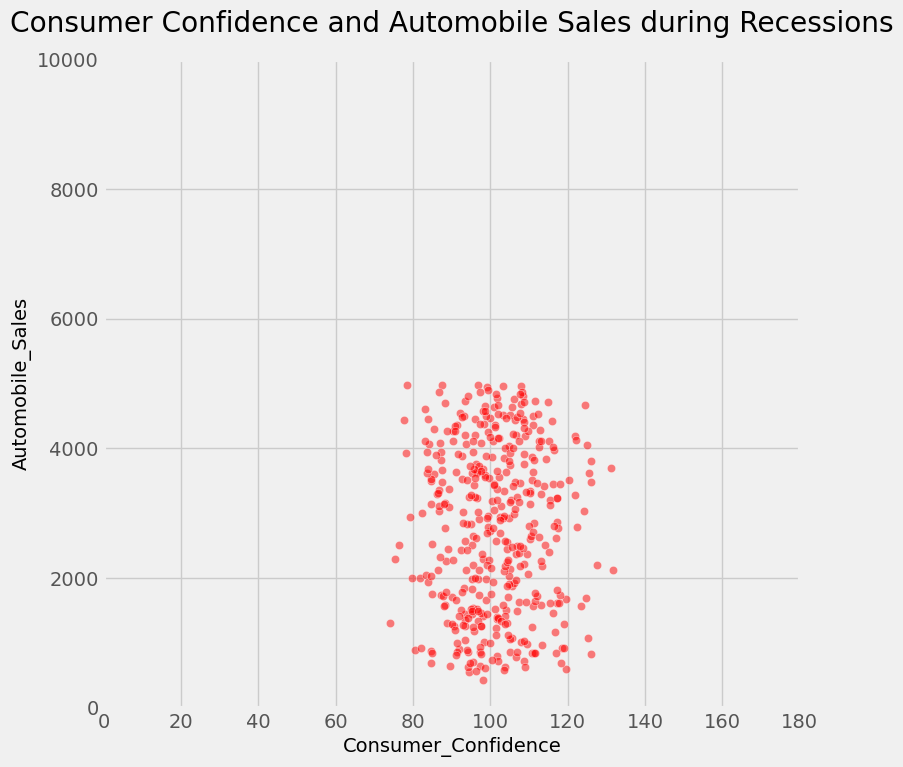

In [37]:
#create a figure
plt.figure(figsize = (8,8))

#create a seaborn.scatterplot
sns.scatterplot(data = df_rec,
                x = 'Consumer_Confidence',
                y = 'Automobile_Sales',
                color = 'red',
                alpha= 0.5)

plt.xlim(0,180) #set the x lim
plt.ylim(0, 10000) #set the y lim

#add a title
plt.title("Consumer Confidence and Automobile Sales during Recessions", pad = 20)

#show the figure
plt.show()

How does the average vehicle price relate to the sales volume during recessions?

Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'

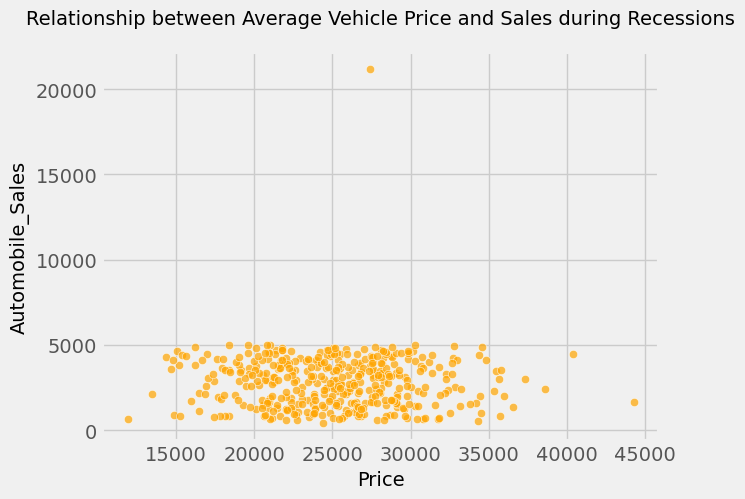

In [38]:
#create a figure and axes
fig, ax = plt.subplots()

#asign a plot to the axes
ax = sns.scatterplot(data = df_rec, x = 'Price', y = 'Automobile_Sales',
                    color = 'orange',
                    alpha = 0.7)

#add a title
ax.set_title("Relationship between Average Vehicle Price and Sales during Recessions", pad = 20, fontsize = 14)

#show the figure
plt.show()

__Exercise__ 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?

In [39]:
#take a look at the data
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [40]:
#take the sum of advertising expenditures during recession.
sum_advert_rec = df[df['Recession'] == 1]['Advertising_Expenditure'].sum()

In [41]:
#take the sum of advertising expenditures during non-recession.
sum_advert_nrec = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()

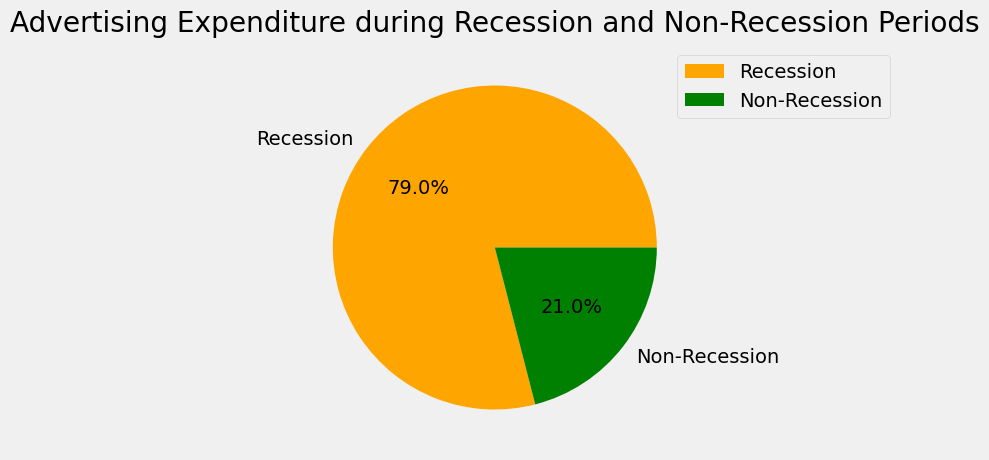

In [42]:
mpl.style.use('seaborn-v0_8-colorblind') #change mpl style
plt.figure(figsize = (8,5)) #set the figure

#create the pie plot
plt.pie([sum_advert_nrec,sum_advert_rec],
        labels = ['Recession', 'Non-Recession'], #add labels
        colors = ['orange', 'green'], #add colors
        autopct = '%1.1f%%' #show percentages
       )

#add a legend
plt.legend(['Recession', 'Non-Recession'], loc = 'upper right', bbox_to_anchor = (1.5,1,0,0))

#set a title
plt.title("Advertising Expenditure during Recession and Non-Recession Periods", pad = 10)
#show the figure
plt.show()

__Inference__:

There is more advertising expenditure occuring during recession times.

__Exercise__ 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.
Can we observe the share of each vehicle type in total sales during recessions?

In [43]:
#extract all recession-related data
df_rec = df[df['Recession'] == 1]

In [44]:
#take a look at the dataframe
df_rec.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [45]:
#create a new df with the sum of advertising revenues per vehicle type.
df_veh = df_rec.groupby(['Vehicle_Type'])['Advertising_Expenditure'].sum().reset_index()

In [46]:
#convert type of advertising expenditure column to float
df_veh['Advertising_Expenditure'] = df_veh["Advertising_Expenditure"].astype(float)

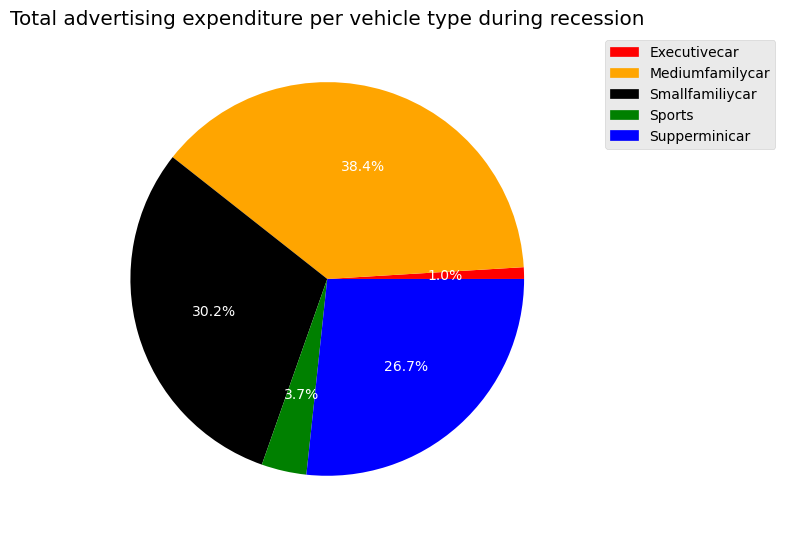

In [47]:
mpl.style.use('ggplot') #change plot style to ggplot
plt.figure(figsize = (8,8)) #set the figure

plt.pie(df_veh['Advertising_Expenditure'],
        labels = df_veh['Vehicle_Type'],
       colors = ['red', 'orange', 'black', 'green', 'blue'],
       autopct = "%1.1f%%", #make the percentages of each piece to appear
       textprops={'color':'white'}) #make autpct parameter appear with while font

legend_labels1 = [i for i in df_veh['Vehicle_Type']] #set legend
legend_handles1 = [plt.Rectangle((0,0),1,1, color=color) for color in ['red', 'orange', 'black', 'green','blue']] #set the legend handles


plt.title("Total advertising expenditure per vehicle type during recession") #set a title
plt.legend(legend_handles1, legend_labels1, bbox_to_anchor = [1.5,1,-.075,0]) #set the legend parameters

plt.tight_layout() #make the plot more kneat

plt.show() #show the plot

__Inference__: During recession times the biggest expenditure was given for medium family cars and small family cars.

__Exercise__ 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.


In [48]:
#let's look at the dataframe
df_rec.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


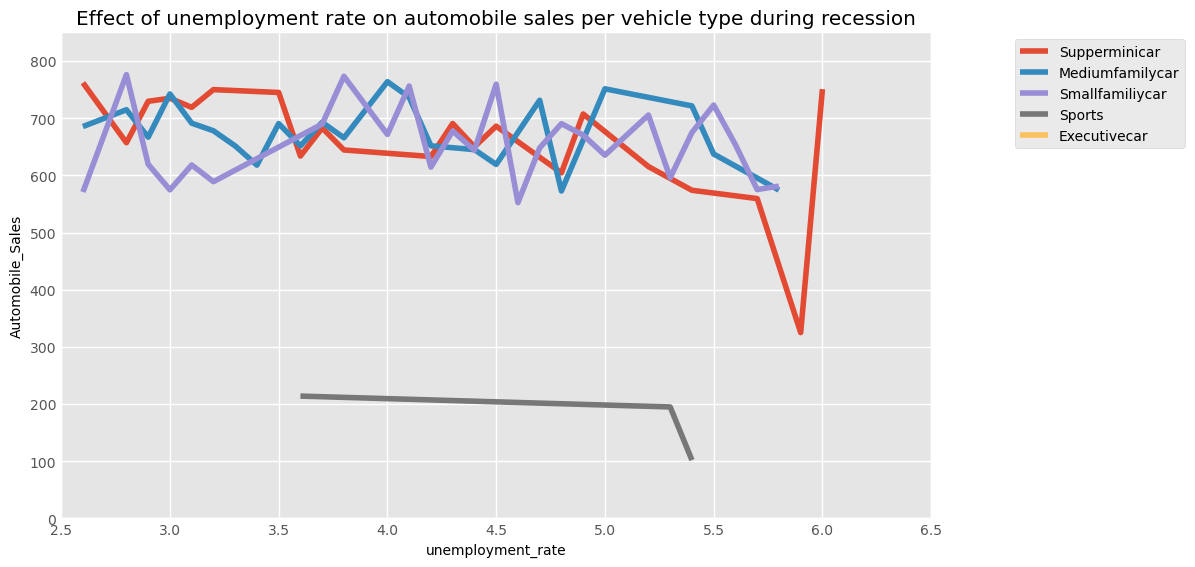

In [49]:
plt.figure(figsize = (10,6)) #set the figure
sns.lineplot(data = df_rec,
             x = 'unemployment_rate',
             y = 'Automobile_Sales',
             hue = 'Vehicle_Type',
             markers = '--',
            err_style = None) #don't show the error area of each line

plt.ylim(0,850) #set y limits
plt.xlim(2.5, 6.5) #set x limits
plt.legend(bbox_to_anchor=[1.3,1,0,0]) #set the legend parameters


plt.title("Effect of unemployment rate on automobile sales per vehicle type during recession") #set a title

plt.show()#show the figure

__Inferences__: As the unemployment rate rose sales fluctuated and except for the significant drop of superminicar sales and subsequent steep rise, medium family, small family cars fluctuated approximately between 600 hundred and 800 units. Sports cars remain steadily around 200 whith a steep decrease at 100 close to the 5.5% unemployment rate.